In [5845]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
import math

## Data Loading

In [5846]:
demand = pd.read_csv("day.csv")

In [5847]:
demand.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5848]:
demand.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<AxesSubplot:>

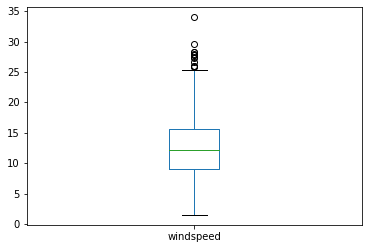

In [5849]:
demand.info()
demand.isnull().values.any()
demand.windspeed.plot.box()

<AxesSubplot:>

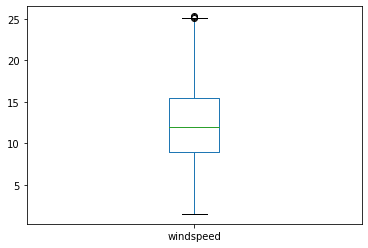

In [5850]:
Q3 = np.quantile(demand["windspeed"], 0.75)
Q1 = np.quantile(demand["windspeed"], 0.25)
IQR = Q3 - Q1
upper_range = Q3 + 1.5 * IQR
demand = demand[demand["windspeed"]<upper_range]
demand.windspeed.plot.box()

<AxesSubplot:>

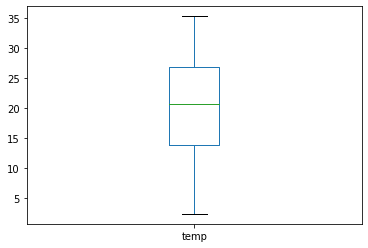

In [5851]:
demand.temp.plot.box()

<AxesSubplot:>

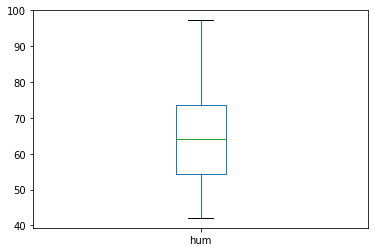

In [5852]:
Q3 = np.quantile(demand["hum"], 0.75)
Q1 = np.quantile(demand["hum"], 0.25)
IQR = Q3 - Q1
lwr_range = Q3 - 1.5 * IQR
demand = demand[demand["hum"]>lwr_range]
demand.hum.plot.box()

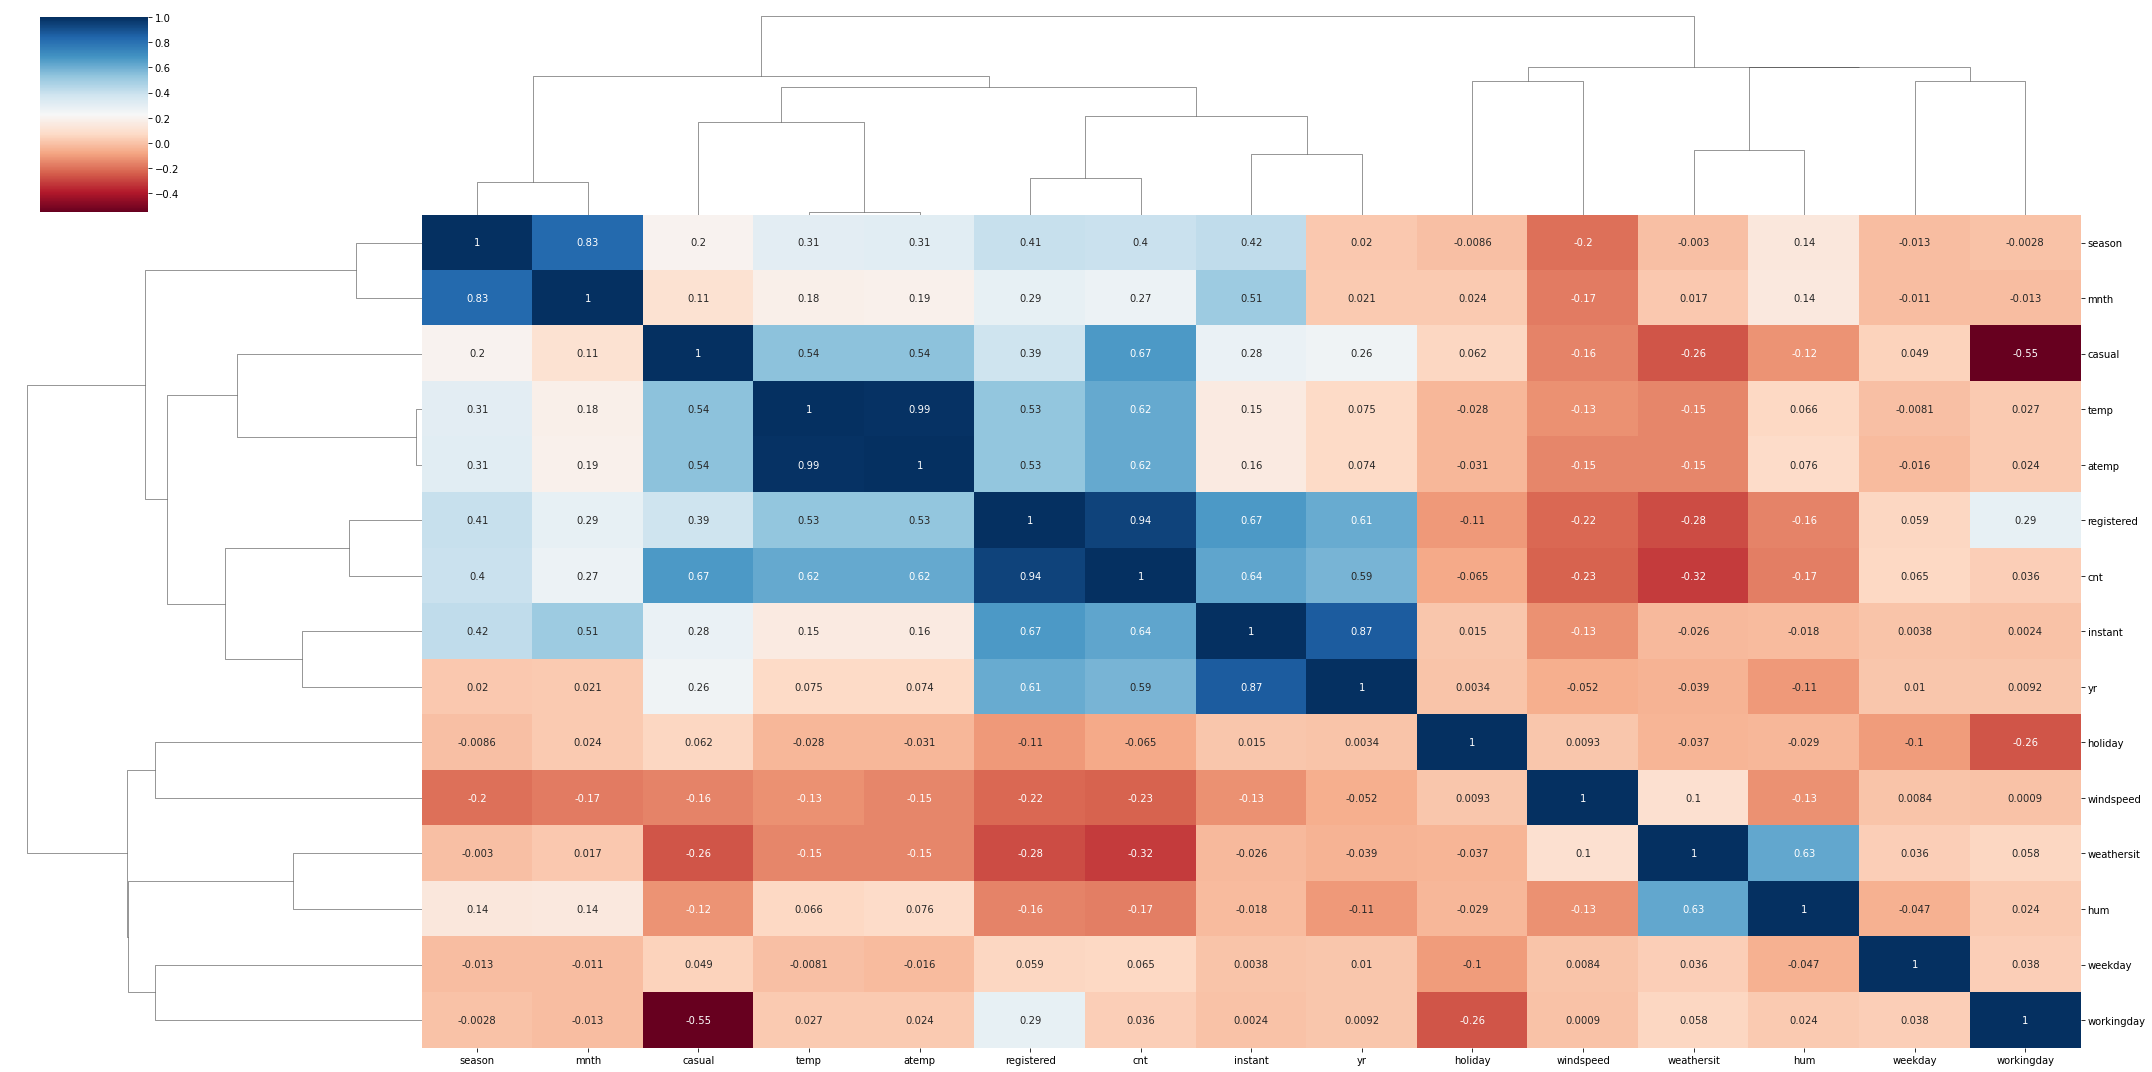

In [5853]:
sns.clustermap(demand.corr(),annot=True,figsize=[30,15],cmap="RdBu")
# Drop: instant, temp, registered, casual

In [5854]:
# instant is sequencing, temp and atemp are highly correlated, casual+registered is cnt; which will alter analysis
demand.drop(['instant', 'temp', 'registered', 'casual'], axis = 1, inplace=True)

In [5855]:
demand["date"] = pd.to_datetime(demand['dteday'])

In [5856]:
## Derive Variable from Date
# Week of month
demand['wom'] = demand["date"].apply(lambda d: (d.day-1) // 7 + 1)

In [5857]:
#Quarter or year
demand['quarter'] = demand['date'].dt.quarter

In [5858]:
# Drop data
demand.drop(['dteday','date'], axis = 1, inplace=True)

<AxesSubplot:>

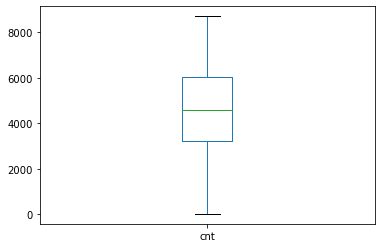

In [5859]:
## No outlier in cnt
demand.cnt.plot.box()

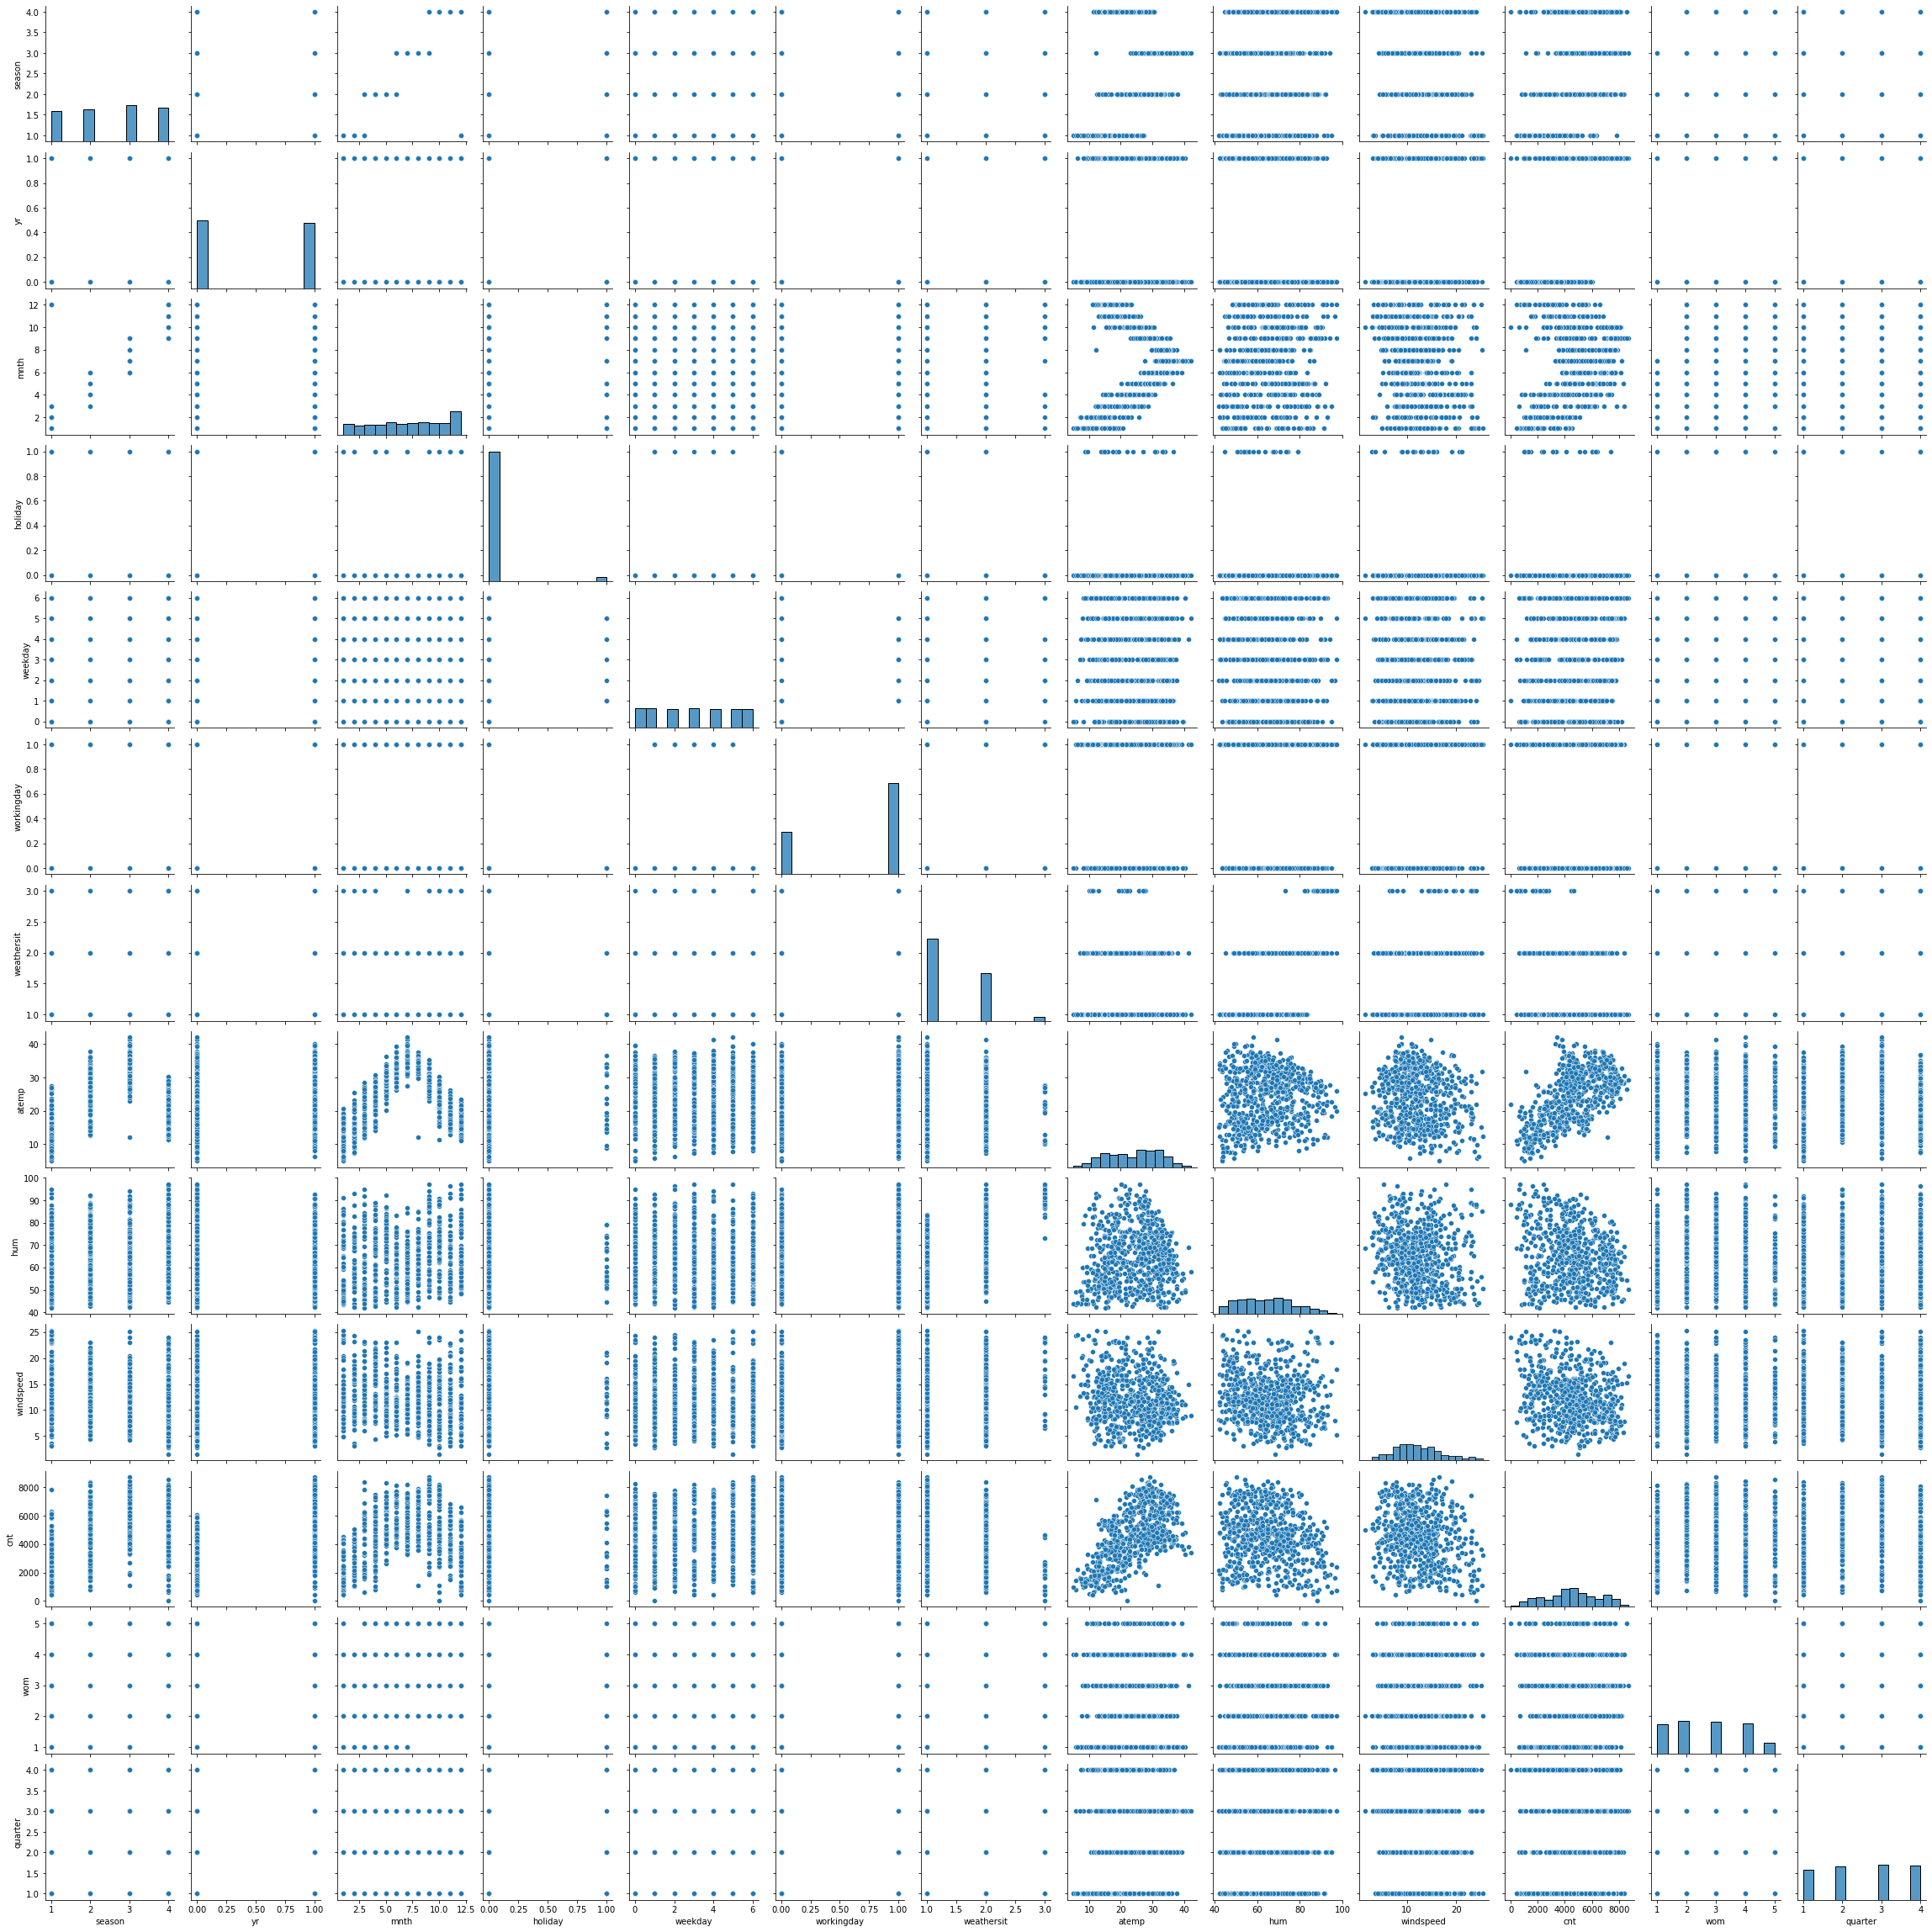

In [5860]:
sns.pairplot(demand)
plt.show()

# Data is applicable for MLR on cnt

In [5861]:
demand.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,wom,quarter
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,1,1
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,1,1
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,1,1


In [5862]:
# Map Categorical cols with understandable name Strings

In [5863]:

def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [5864]:

def weather_map(x):
    return x.map({1:'clear', 2:'mist', 3:'snow', 4:'rain'})

def day_map(x):
    return x.map({0:'mon',1:'tue', 2:'wed', 3:'thurs', 4:'fri',5:'sat', 6:'sun'})

In [5865]:
def month_map(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may', 6:'june',7:'july', 8:'aug', 9:'sept', 10:'oct',11:'nov', 12:'dec'})     


In [5866]:

def week_map(x):
    return x.map({1:'1', 2:'2', 3:'3', 4:'4'})     

def quarter_map(x):
    return x.map({1:'1', 2:'2', 3:'3', 4:'4'})   

In [5867]:
demand["season"] = demand[["season"]].apply(season_map)

In [5868]:
demand["weekday"] = demand[["weekday"]].apply(day_map)
demand["weathersit"] = demand[["weathersit"]].apply(weather_map)
demand["mnth"] = demand[["mnth"]].apply(month_map)
demand["wom"] = demand[["wom"]].apply(week_map)
demand["quarter"] = demand[["quarter"]].apply(quarter_map)

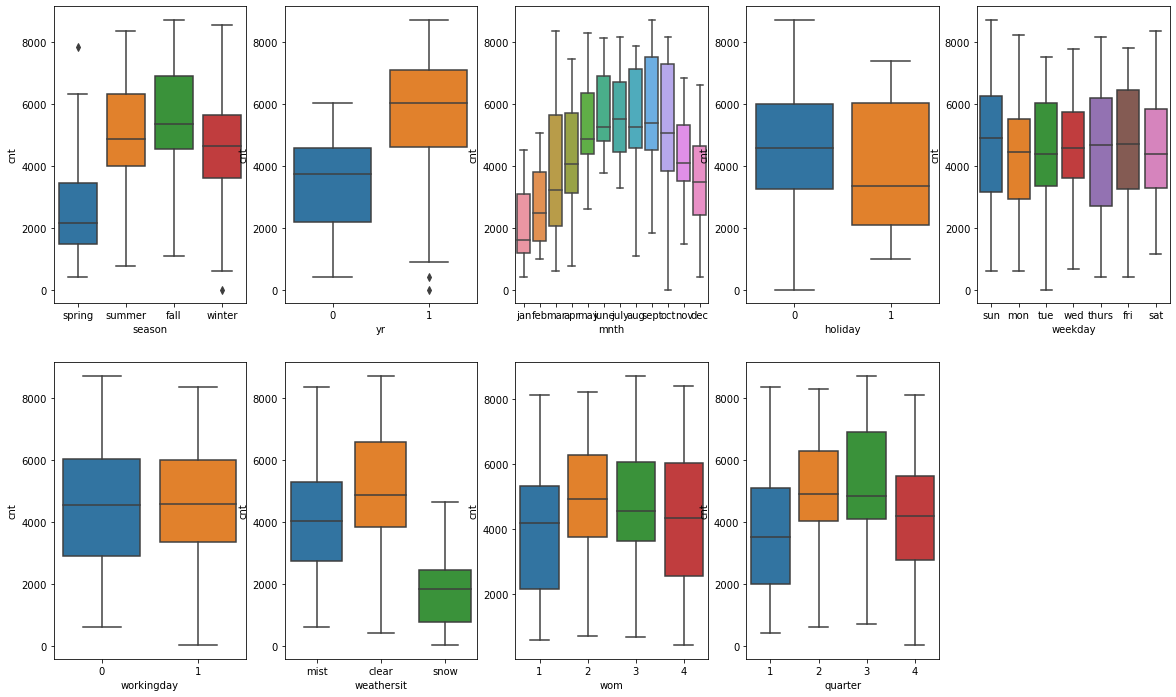

In [5869]:
# Relation of categorcial vars with cnt
plt.figure(figsize=(20, 12))
plt.subplot(2,5,1)
sns.boxplot(x = 'season', y = 'cnt', data = demand)
plt.subplot(2,5,2)
sns.boxplot(x = 'yr', y = 'cnt', data = demand)
plt.subplot(2,5,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = demand)
plt.subplot(2,5,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = demand)
plt.subplot(2,5,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = demand)
plt.subplot(2,5,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = demand)
plt.subplot(2,5,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = demand)
plt.subplot(2,5,8)
sns.boxplot(x = 'wom', y = 'cnt', data = demand)
plt.subplot(2,5,9)
sns.boxplot(x = 'quarter', y = 'cnt', data = demand)
plt.show()

In [5870]:
demand.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,wom,quarter
0,spring,0,jan,0,sun,0,mist,18.18125,80.5833,10.749882,985,1,1


In [5871]:
encoded = pd.get_dummies(demand[['season','mnth','weekday','weathersit','wom','quarter']], drop_first = True)

In [5872]:
encoded.head(2)
encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 729
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   season_spring    675 non-null    uint8
 1   season_summer    675 non-null    uint8
 2   season_winter    675 non-null    uint8
 3   mnth_aug         675 non-null    uint8
 4   mnth_dec         675 non-null    uint8
 5   mnth_feb         675 non-null    uint8
 6   mnth_jan         675 non-null    uint8
 7   mnth_july        675 non-null    uint8
 8   mnth_june        675 non-null    uint8
 9   mnth_mar         675 non-null    uint8
 10  mnth_may         675 non-null    uint8
 11  mnth_nov         675 non-null    uint8
 12  mnth_oct         675 non-null    uint8
 13  mnth_sept        675 non-null    uint8
 14  weekday_mon      675 non-null    uint8
 15  weekday_sat      675 non-null    uint8
 16  weekday_sun      675 non-null    uint8
 17  weekday_thurs    675 non-null    uint8
 18  weekday_tu

In [5873]:
demand.drop(['season','mnth','weekday','weathersit','wom','quarter'], axis = 1, inplace=True)

In [5874]:
demand = pd.concat([demand, encoded], axis = 1)

In [5875]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 729
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               675 non-null    int64  
 1   holiday          675 non-null    int64  
 2   workingday       675 non-null    int64  
 3   atemp            675 non-null    float64
 4   hum              675 non-null    float64
 5   windspeed        675 non-null    float64
 6   cnt              675 non-null    int64  
 7   season_spring    675 non-null    uint8  
 8   season_summer    675 non-null    uint8  
 9   season_winter    675 non-null    uint8  
 10  mnth_aug         675 non-null    uint8  
 11  mnth_dec         675 non-null    uint8  
 12  mnth_feb         675 non-null    uint8  
 13  mnth_jan         675 non-null    uint8  
 14  mnth_july        675 non-null    uint8  
 15  mnth_june        675 non-null    uint8  
 16  mnth_mar         675 non-null    uint8  
 17  mnth_may        

##  Train Test Data split

In [5876]:
np.random.seed(0)
df_train, df_test = train_test_split(demand, train_size = 0.7, test_size = 0.3, random_state = 100)

In [5877]:
scaler = MinMaxScaler()

In [5878]:
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [5879]:
y_train = df_train.pop('cnt')
X_train = df_train


In [5880]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 599 to 571
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               472 non-null    int64  
 1   holiday          472 non-null    int64  
 2   workingday       472 non-null    int64  
 3   atemp            472 non-null    float64
 4   hum              472 non-null    float64
 5   windspeed        472 non-null    float64
 6   season_spring    472 non-null    uint8  
 7   season_summer    472 non-null    uint8  
 8   season_winter    472 non-null    uint8  
 9   mnth_aug         472 non-null    uint8  
 10  mnth_dec         472 non-null    uint8  
 11  mnth_feb         472 non-null    uint8  
 12  mnth_jan         472 non-null    uint8  
 13  mnth_july        472 non-null    uint8  
 14  mnth_june        472 non-null    uint8  
 15  mnth_mar         472 non-null    uint8  
 16  mnth_may         472 non-null    uint8  
 17  mnth_nov      

## Model Building

In [5881]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

In [5882]:
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     76.78
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.36e-160
Time:                        01:41:58   Log-Likelihood:                 478.79
No. Observations:                 472   AIC:                            -889.6
Df Residuals:                     438   BIC:                            -748.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2015      0.038      5.260      0.000       0.126       0.277
yr                  0.2346      0.009     26.934      0.000       0.217       0.252
holiday             0.0011      0.024      0.045      0.964      -0.046       0.048
workingday          0.0716      0.013      5.330      0.000       0.045       0.098
atemp               0.3693      0.049      7.482      0.000       0.272       0.466
hum                -0.1306      0.027     -4.853      0.000      -0.183      -0.078
windspeed          -0.0908      0.022     -4.166      0.000      -0.134      -0.048
season_spring      -0.0675      0.034     -1.958      0.051      -0.135       0.000
season_summer       0.0426      0.032      1.343      0.180      -0.020       0.105
season_winter       0.0796      0.028      2.834      0.005       0.024       0.135
mnth_aug            0.0716      0.041      1.736      0.083      -0.009       0.153
mnth_dec           -0.0164      0.041     -0.402      0.688      -0.096       0.064
mnth_feb           -0.0193      0.040     -0.484      0.628      -0.097       0.059
mnth_jan           -0.0375      0.041     -0.919      0.359      -0.118       0.043
mnth_july           0.0192      0.043      0.451      0.653      -0.064       0.103
mnth_june           0.0434      0.026      1.654      0.099      -0.008       0.095
mnth_mar            0.0511      0.032      1.584      0.114      -0.012       0.114
mnth_may            0.0537      0.022      2.421      0.016       0.010       0.097
mnth_nov           -0.0185      0.043     -0.429      0.668      -0.103       0.066
mnth_oct            0.0735      0.043      1.722      0.086      -0.010       0.157
mnth_sept           0.1312      0.039      3.380      0.001       0.055       0.207
weekday_mon         0.0355      0.015      2.396      0.017       0.006       0.065
weekday_sat         0.0172      0.016      1.046      0.296      -0.015       0.050
weekday_sun         0.0934      0.015      6.357      0.000       0.065       0.122
weekday_thurs       0.0044      0.016      0.270      0.787      -0.028       0.036
weekday_tue        -0.0187      0.016     -1.148      0.252      -0.051       0.013
weekday_wed        -0.0037      0.017     -0.226      0.822      -0.036       0.029
weathersit_mist    -0.0458      0.012     -3.975      0.000      -0.068      -0.023
weathersit_snow    -0.2358      0.033     -7.106      0.000      -0.301      -0.171
wom_2               0.0265      0.016      1.642      0.101      -0.005       0.058
wom_3               0.0389      0.012      3.154      0.002       0.015       0.063
wom_4               0.0048      0.013      0.363      0.717      -0.021       0.031
quarter_2           0.0131      0.016      0.846      0.398      -0.017       0.044
quarter_3          -0.0002      0.016     -0.011      0.992

In [5883]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weekday_mon,inf
2,holiday,inf
3,workingday,inf
23,weekday_sun,inf
7,season_spring,12.10
8,season_summer,10.57
14,mnth_july,8.72
9,season_winter,8.59
11,mnth_dec,8.30
18,mnth_nov,8.22


## RFE

In [5884]:
rfe_var_count = 7

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, rfe_var_count)             
rfe = rfe.fit(X_train_lm, y_train)

In [5885]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 26),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', False, 21),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 19),
 ('mnth_feb', False, 4),
 ('mnth_jan', False, 6),
 ('mnth_july', False, 5),
 ('mnth_june', True, 1),
 ('mnth_mar', False, 18),
 ('mnth_may', False, 17),
 ('mnth_nov', False, 12),
 ('mnth_oct', False, 3),
 ('mnth_sept', False, 22),
 ('weekday_mon', False, 7),
 ('weekday_sat', False, 20),
 ('weekday_sun', False, 16),
 ('weekday_thurs', False, 9),
 ('weekday_tue', False, 25),
 ('weekday_wed', False, 15),
 ('weathersit_mist', False, 28),
 ('weathersit_snow', False, 8),
 ('wom_2', True, 1),
 ('wom_3', False, 14),
 ('wom_4', False, 13),
 ('quarter_2', False, 27),
 ('quarter_3', False, 23),
 ('quarter_4', False, 29)]

In [5886]:
rfe.support_

array([False,  True, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False])

In [5887]:
col = X_train_lm.columns[rfe.support_]
col

Index(['yr', 'atemp', 'hum', 'windspeed', 'season_spring', 'mnth_july',
       'weathersit_snow'],
      dtype='object')

In [5888]:
X_train_rfe = X_train_lm[col]


In [5889]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [5890]:
lm_rfe = sm.OLS(y_train,X_train_rfe).fit() 

In [5891]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,24.21
2,atemp,2.08
5,season_spring,1.70
6,mnth_july,1.35
3,hum,1.24
7,weathersit_snow,1.20
4,windspeed,1.12
1,yr,1.03


In [5892]:
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     281.0
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.95e-162
Time:                        01:41:58   Log-Likelihood:                 417.82
No. Observations:                 472   AIC:                            -819.6
Df Residuals:                     464   BIC:                            -786.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3389      0.023     14.859      0.000       0.294       0.384
yr                  0.2344      0.009     24.901      0.000       0.216       0.253
atemp               0.4593      0.031     15.056      0.000       0.399       0.519
hum                -0.1683      0.022     -7.509      0.000      -0.212      -0.124
windspeed          -0.1156      0.023     -5.021      0.000      -0.161      -0.070
season_spring      -0.1562      0.014    -10.928      0.000      -0.184      -0.128
mnth_july          -0.0964      0.019     -5.204      0.000      -0.133      -0.060
weathersit_snow    -0.1740      0.034     -5.180      0.000      -0.240      -0.108
==============================================================================
Omnibus:                       56.042   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.176
Skew:                          -0.670   Prob(JB):                     9.77e-26
Kurtosis:                       5.015   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis for Training

In [5893]:
y_train_pred = lm_rfe.predict(X_train_rfe)

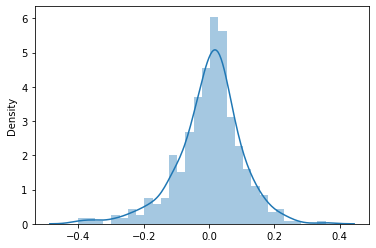

In [5894]:
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.show()

## Model Evaluation

In [5895]:
num_vars = ['atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [5896]:
y_test = df_test.pop('cnt')


In [5897]:
X_test = df_test[col]

In [5898]:
X_test_lm = sm.add_constant(X_test)


In [5899]:
len(X_test_lm.columns)

8

In [5900]:
y_test_pred = lm_rfe.predict(X_test_lm)

## Residual Analysis for Testing

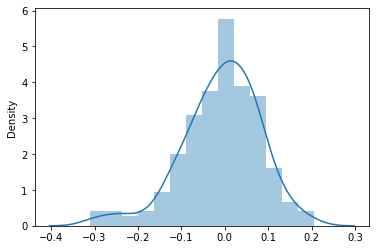

In [5901]:
res = y_test - y_test_pred
plt.figure()
sns.distplot(res.to_frame())
plt.show()

# residuals follow normal distribution

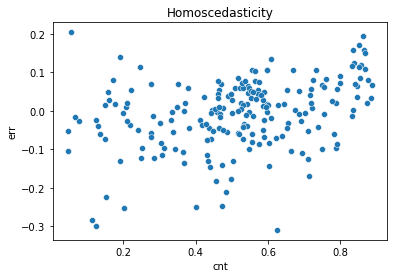

In [5902]:
# Homoscedasticity over test data
y_test_df=y_test.to_frame()
y_test_pred_df=y_test_pred.to_frame()
y_test_pred_df["pred_cnt"] = y_test_pred_df[y_test_pred_df.columns[0]]
y_test_pred_df.drop([y_test_pred_df.columns[0]],inplace=True,axis=1)
y_test_df["err"] = y_test_df["cnt"]-y_test_pred_df["pred_cnt"]
plt.title("Homoscedasticity")
sns.scatterplot(data=y_test_df, x="cnt", y="err")
plt.show()

# does not reflect any strong pattern for Heterocedasticity

<AxesSubplot:xlabel='index', ylabel='err'>

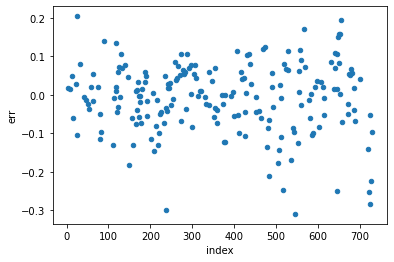

In [5903]:
res_df=y_test_df.reset_index()
res_df.plot.scatter(x="index", y="err")
# Error terms are random and not dependent on each other

Text(0, 0.5, 'y_pred')

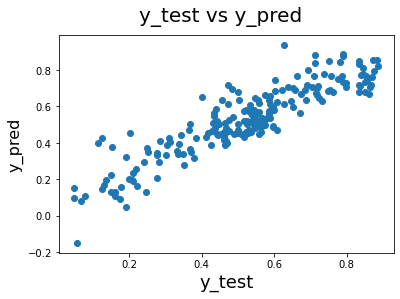

In [5904]:
fig = plt.figure()
plt.scatter(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 16)  

In [5905]:
r2= r2_score(y_true=y_test,y_pred=y_test_pred)

In [5906]:
r2

0.8124193814022056

## RFE Analysis

### Following are the result of analysis based on rfe_var_count chosen in a iterative manner.

### At rfe_var_count of 6 there is considerable dip in R2 scores at once for 1 %, so at rfe_var_cont=7 there is base model explaining 81% of the variance compared to rfe_var_cont=18 which explains near to 84% of variance. 

### RFE_vars=7     |         R2 = 0.809       |       Adj. R2 = 0.806       |     Test R2= 0.81

### Below is table for representing all model build and their R2 scores:


| RFE_vars    | R2          |  Adj R2 | Test R2 |
| ----------- | ----------- |---------|---------|
| 25          | 0.851       |   0.843 |0.8431   |
| 20          | 0.849       |   0.842 |0.8475   |
| 19          | 0.847       |   0.841 |0.8443   |
| 18          | 0.844       |   0.838 |0.8440   |
| 17          | 0.843       |   0.837 |0.8421   |
| 16          | 0.842       |   0.837 |0.8413   |
| 15          | 0.837       |   0.832 |0.8353   |
| 14          | 0.835       |   0.830 |0.8366   |
| 13          | 0.830       |   0.825 |0.8264   |
| 12          | 0.825       |   0.820 |0.8220   |
| 11          | 0.822       |   0.818 |0.8265   |
| 10          | 0.820       |   0.816 |0.8270   |
| 9           | 0.818       |   0.814 |0.8190   |
| 8           | 0.814       |   0.811 |0.8200   |
| 7           | 0.809       |   0.806 |0.8124   |
| 6           | 0.798       |   0.795 |0.8087   |
| 5           | 0.789       |   0.787 |0.7945   |
| 4           | 0.776       |   0.774 |0.7673   |
| 3           | 0.718       |   0.716 |0.6948   |
